# BE PROPULSION : Exploitation d'un modèle de turbofan.

Notes data de base du modèle amenées à varier:
- OPR = 40
- Tt4 = 1600 K
- BPR = LAMBDA = 11

## QUESTION 2

In [39]:
# importer le modèle
from TurboFan_model import TurboFan

# definir les datas pour plot 
nbOPR = 200
nbTt4 = 5
OPR_data = []
ETA_th_data = []
Tt4_plots = []

# récolter les datas
for i in range(nbTt4):
    baseTt4 = 1500
    finTt4 = 1700
    Tt4 = baseTt4 + ((finTt4-baseTt4)/nbTt4)*i
    for j in range(nbOPR):
        baseOPR = 10
        finOPR = 100
        OPR = baseOPR + ((finOPR-baseOPR)/nbOPR)*j
        engine = TurboFan(OPR, Tt4)
        OPR_data.append(OPR)
        ETA_th_data.append(engine.ETA_thermique)
    Tt4_plots.append([OPR_data, ETA_th_data])
    OPR_data = []
    ETA_th_data = []



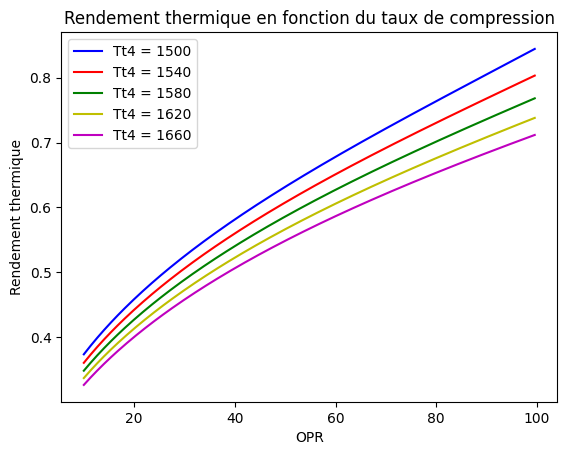

In [40]:
import matplotlib.pyplot as plt

colors = ['b', 'r', 'g', 'y', 'm']  # Add more colors if needed

for k, Tt4 in enumerate(Tt4_plots):
    plt.plot(Tt4[0], Tt4[1], marker='', linestyle='-', color=colors[k%5], label=f'Tt4 = {int(baseTt4 + ((finTt4-baseTt4)/nbTt4)*k)}')

# Add labels and title
plt.xlabel('OPR')
plt.ylabel('Rendement thermique')
plt.title('Rendement thermique en fonction du taux de compression')

# Add a legend
plt.legend()

## QUESTION 3

In [10]:
# importer le modèle
from TurboFan_model import TurboFan

# definir les datas pour plot 
nbBPR = 100
nbPIf = 5
BPR_data = []
ETA_global_data = []
PIf_plots = []

# récolter les datas
for j in range(nbPIf):
    basePIf = 1.3
    finPIf = 1.5
    PIf = basePIf + ((finPIf-basePIf)/nbPIf)*j
    for i in range(nbBPR):
        baseBPR = 5
        finBPR = 20
        BPR = baseBPR + ((finBPR-baseBPR)/nbBPR)*i
        engine = TurboFan(40, 1600, BPR, PIf)
        BPR_data.append(BPR)
        ETA_global_data.append(engine.ETA_total)
    PIf_plots.append([BPR_data, ETA_global_data])
    BPR_data = []
    ETA_global_data = []


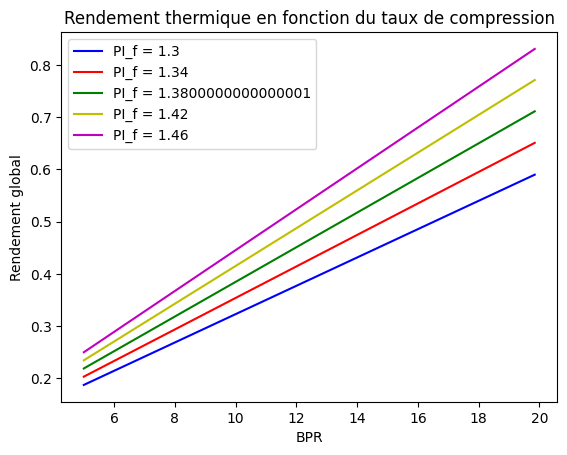

In [11]:

import matplotlib.pyplot as plt

colors = ['b', 'r', 'g', 'y', 'm']

for i, PIf in enumerate(PIf_plots):
    plt.plot(PIf[0], PIf[1], marker='', linestyle='-', color=colors[i%5], label=f'PI_f = {float(basePIf + ((finPIf-basePIf)/nbPIf)*i)}')

# Add labels and title
plt.xlabel('BPR')
plt.ylabel('Rendement global')
plt.title('Rendement thermique en fonction du taux de compression')

# Add a legend
plt.legend()

## QUESTION 4

Nous allons faire une optimisation

In [ ]:
from scipy.optimize import minimize

# Example maximum value for output1
RMAX = 1

# Initial guess for the variables
x0 = [40, 1600, 11, 1]

# Bounds for the variables, if any (here assuming no bounds)
bounds = [(None, None), (None, None), (None, None), (None, None)]

# Define the constraint in the form required by scipy.optimize
cons = {'type': 'ineq', 'fun': constraint}

# Define the objective to maximize output2
def objective(x):
    _, output2 = objective_function(x)
    return -output2  # Negate because we are using minimize

# Perform the optimization
result = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=cons)

# Check the results
if result.success:
    optimized_x = result.x
    print(f'Optimized variables: {optimized_x}')
    output1, output2 = objective_function(optimized_x)
    print(f'Output1: {output1}, Output2: {output2}')
else:
    print('Optimization failed:', result.message)